#### 1. Importações

In [1]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

#### 2. Colocando Shape's e textos

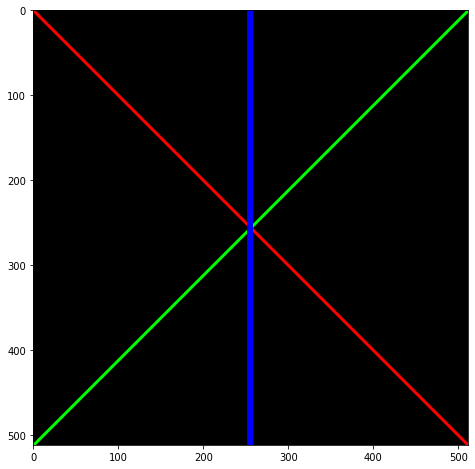

In [2]:
# Tela 512x512 com 3 canais de cores [np.zeros é ausência de cor logo, o fundo será preto]
canvas = np.zeros((512, 512, 3), dtype="uint8")

# Red G B
Red = [255, 0, 0]

# R Green B
Green = [0, 255, 0]

# R G Blue
Blue = [0, 0, 255]

# cv2.line(img, start_point, end_point, color, thickness)

# Linha Red
cv2.line(canvas, (0, 0), (512, 512), Red, 2)

# Linha Green
cv2.line(canvas, (512, 0), (0, 512), Green, 2)

# Linha Blue
cv2.line(canvas, (255, 512), (255, 0), Blue, 5)

plt.figure(figsize=(12, 8))
plt.imshow(canvas)
plt.show()

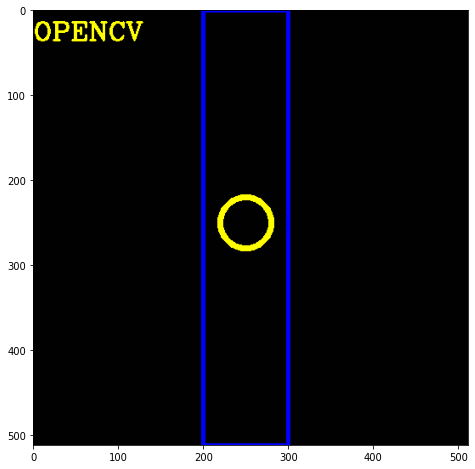

In [3]:
canvas2 = np.ones((512, 512, 3), np.uint8)

# Retângulo na imagem
# cv2.rectangle(img, start_point, end_point, color, thickness)
cv2.rectangle(canvas2, (200, 0), (300, 512), (0, 0 , 255), 3)

# Circulo na imagem
# cv2.circle(img, centre, radius, color, thickness)
cv2.circle(canvas2, (250, 250), 30, (255, 255, 0), 5)

# Texto na imagem
# cv2.putText(img, text, coordinate, fonttype, size, color, thickness)
cv2.putText(canvas2, "OPENCV", (0, 35), cv2.FONT_HERSHEY_COMPLEX, 1, (255, 255, 0), 2)

plt.figure(figsize=(12, 8))
plt.imshow(canvas2)
plt.show()

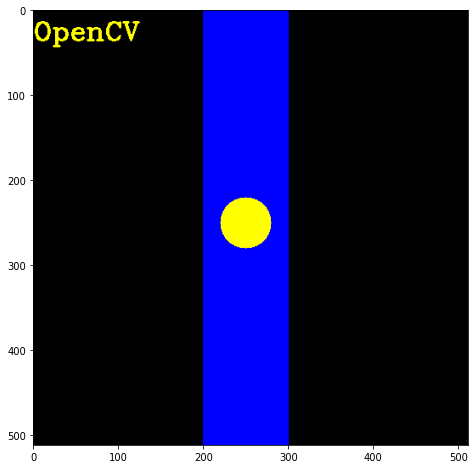

In [4]:
img = np.ones((512, 512, 3), np.uint8)

# Retângulo na imagem (Preenchido)
# cv2.rectangle(img, start_point, end_point, color, thickness)
cv2.rectangle(img, (200, 0), (300, 512), (0, 0 , 255), -1)

# Circulo na imagem (Preenchido)
# cv2.circle(img, centre, radius, color, thickness)
cv2.circle(img, (250, 250), 30, (255, 255, 0), -1)

# Texto na imagem
# cv2.putText(img, text, coordinate, fonttype, size, color, thickness)
cv2.putText(img, "OpenCV", (0, 35), cv2.FONT_HERSHEY_COMPLEX, 1, (255, 255, 0), 2)

plt.figure(figsize=(12, 8))
plt.imshow(img)
plt.show()

#### 3. Funções básicas do OpenCV

In [5]:
# Função para abrir a imagem com matplotlib
def showImage(img): 
    # BGR > RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    
    plt.figure(figsize=(8, 8))
    plt.imshow(img)
    plt.grid(False)
    plt.axis('off')
    plt.show()

# Função para mudar a cor da imagem nos canais RGB
def mudaCor(img, num1, num2):
    
    # BGR > RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    altura, largura, rgb = img.shape
    
    for y in range(0, altura):
        for i in range(0, largura):
        
            blue = img.item(y, i, 0)
            green = img.item(y, i, 1)
            red = img.item(y, i, 2)

            img.itemset((y, i, num1), 0)
            img.itemset((y, i, num2), 0)
            
    
    plt.figure(figsize=(8, 8))
    plt.imshow(img)
    plt.show()

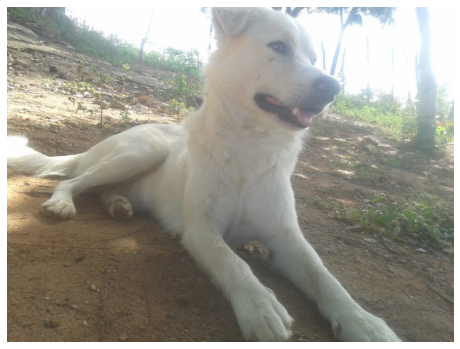

Altura: 1200 pixels
Largura: 1600 pixels
Canais: 3


In [6]:
# Leitura da imagem
img = cv2.imread("images/toddy4.jpeg")
showImage(img)

# Dimensões e canais da imagem passada
print(f"Altura: {img.shape[0]} pixels")
print(f"Largura: {img.shape[1]} pixels")
print(f"Canais: {img.shape[2]}")

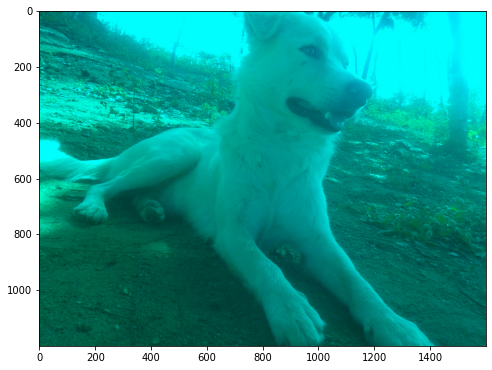

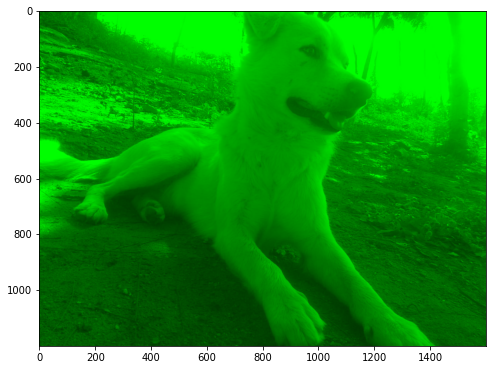

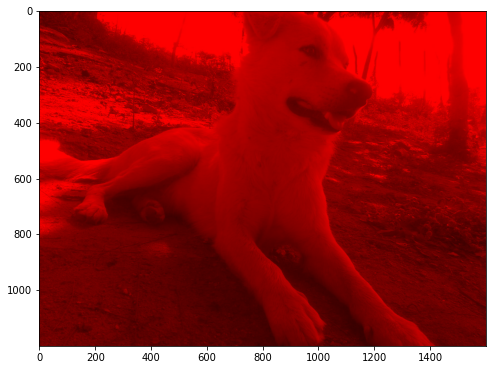

In [7]:
# Canal de cor Blue
imgBlue = img.copy()
mudaCor(imgBlue, 0, 0)
# Canal de cor Green
imgGreen = img.copy()
mudaCor(imgGreen, 0, 2)
# Canal de cor Red
imgRed = img.copy()
mudaCor(imgRed, 2, 1)

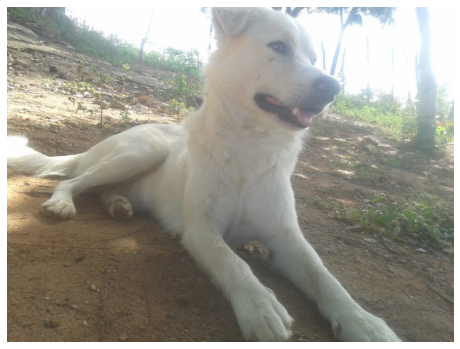

(1200, 1600, 3)


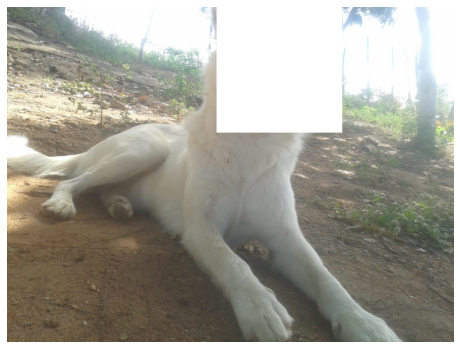

(1200, 1600, 3)


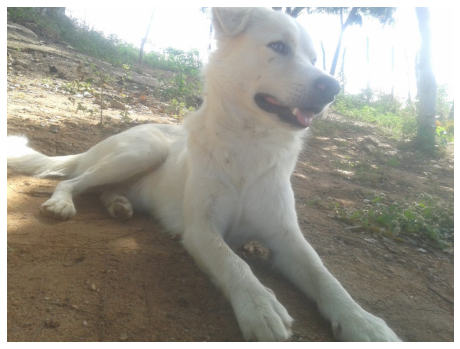

(480, 640, 3)


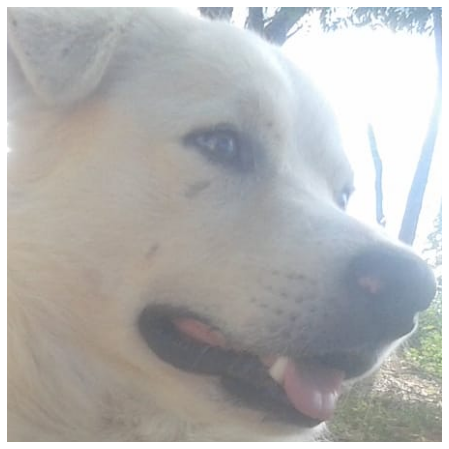

(450, 450, 3)


In [8]:
# Corte da imagem para 640, 480 (width, height)
imgResize = cv2.resize(img, (640, 480))

# Mudando os pixels do objeto para branco
imgChanged = img.copy()
imgChanged[0:450, 750:1200, :] = [255, 255, 255]

# Corte da imagem do Eixo y do 225 ao 675 e do x do 180 ao 625
imgCropped = img[0:450, 750:1200, :]

# Imagem original
showImage(img)
print(img.shape)

# Recorte do objeto na imagem
showImage(imgChanged)
print(imgChanged.shape)

# Resize da imagem
showImage(imgResize)
print(imgResize.shape)

# Recorte da imagem
showImage(imgCropped)
print(imgCropped.shape)

#### 3. Pré-Processamento e filtros

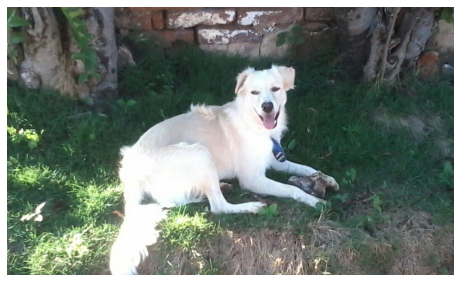

In [9]:
# Leitura da imagem
img2 = cv2.imread("images/toddy.jpeg")
showImage(img2)

kernel = np.ones((5,5), np.uint8)

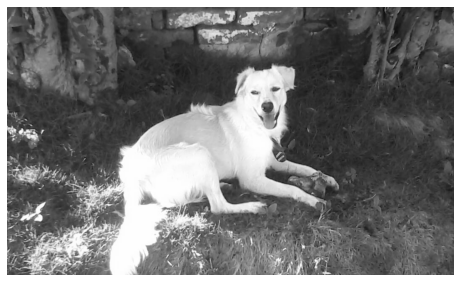

In [10]:
# Gray Scale
img_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
showImage(img_gray)

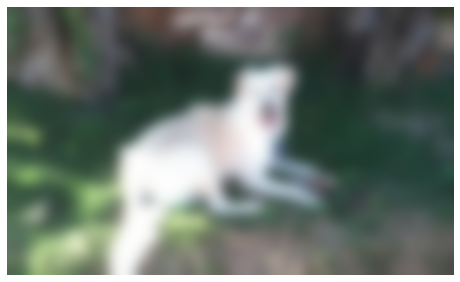

In [11]:
# Filtro Passa-baixa (Gaussian Blur)
img_blur = cv2.GaussianBlur(img2, (101, 101), 0)
showImage(img_blur)

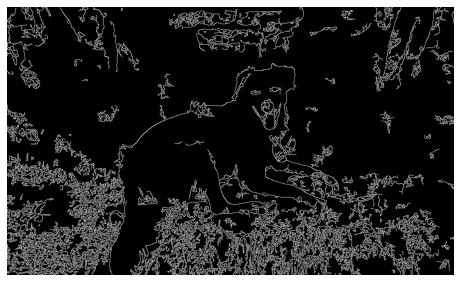

In [12]:
# Filtro Passa-alta (Edge's Detection)
img_canny = cv2.Canny(img2, 15, 255)
showImage(img_canny)

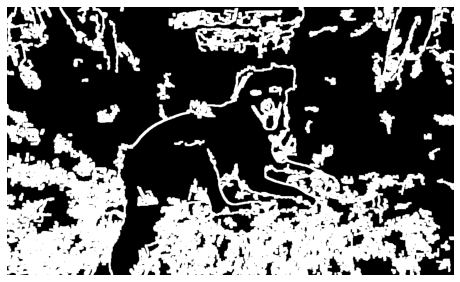

In [13]:
# Dilatação da imagem: Dá enfâse nas bordas
img_dialation = cv2.dilate(img_canny, kernel, iterations=1)
showImage(img_dialation)

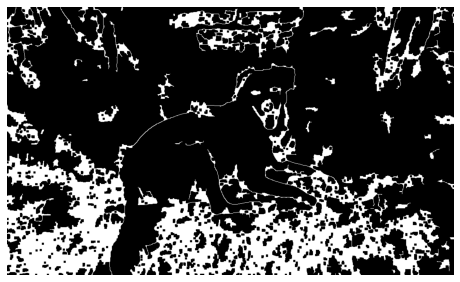

In [14]:
# Erosão da imagem: Torna a borda mais fina
img_eroded = cv2.erode(img_dialation, kernel, iterations=1)
showImage(img_eroded)

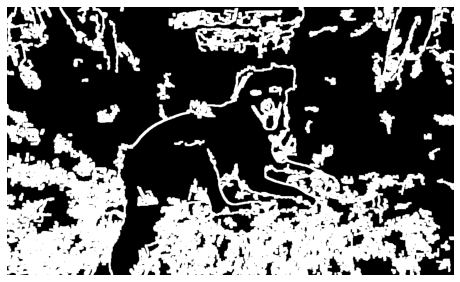

In [15]:
# Abertura: Erosão seguida da Dilatação
img_eroded = cv2.erode(img_eroded, kernel, iterations=1)
img_dialation = cv2.dilate(img_canny, kernel, iterations=1)

showImage(img_dialation)

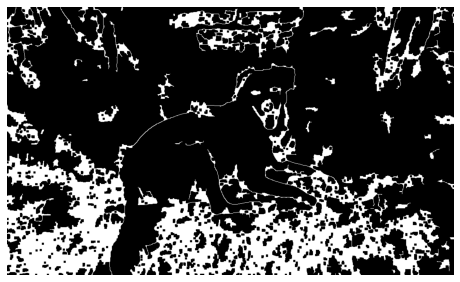

In [16]:
# Fechamento: Dilatação seguida de erosão
img_dialation = cv2.dilate(img_canny, kernel, iterations=1)
img_eroded = cv2.erode(img_dialation, kernel, iterations=1)

showImage(img_eroded)

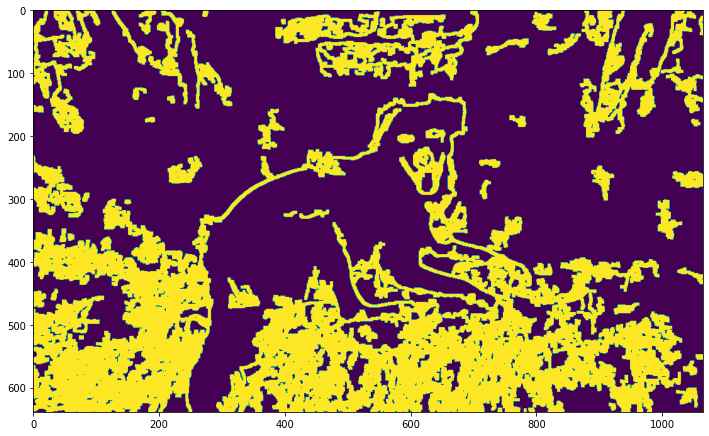

In [17]:
def filterDialation(path):
    kernal = np.ones((5,5), np.uint8)
    img = cv2.imread(path)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_blur = cv2.GaussianBlur(img_gray, (3, 3), 0)
    img_canny = cv2.Canny(img, 0, 255)
    img_dialation = cv2.dilate(img_canny, kernal, iterations=1)
    
    
    plt.figure(figsize=(12, 8))
    plt.imshow(img_dialation)
    plt.show()

filterDialation("images/toddy.jpeg")

#### 4. Manipulações de imagens

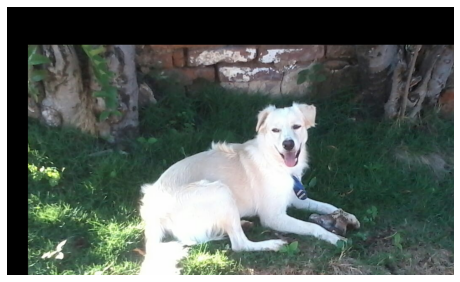

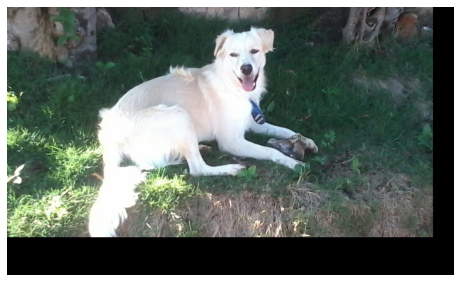

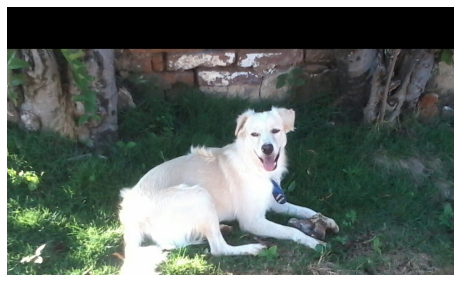

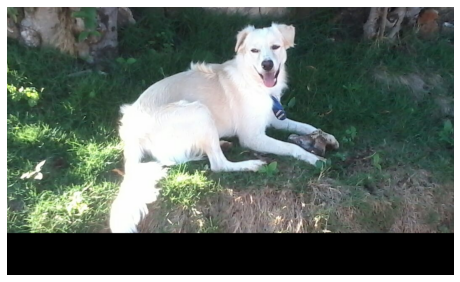

In [18]:
# Leitura da imagem
img = cv2.imread("images/toddy.jpeg")

# Shifting de imagens (Baixo Direita)
M = np.float32([[1, 0, 50], [0, 1, 90]])
shifted = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))
showImage(shifted)

# Shifting de imagens (Cima Esquerda)
M = np.float32([[1, 0, -50], [0, 1, -90]])
shifted = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))
showImage(shifted)

# Shifting de imagens (Baixo)
M = np.float32([[1, 0, 0], [0, 1, 100]])
shifted = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))
showImage(shifted)

# Shifting de imagens (Cima)
M = np.float32([[1, 0, 0], [0, 1, -100]])
shifted = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))
showImage(shifted)

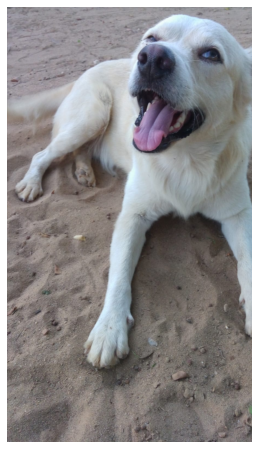

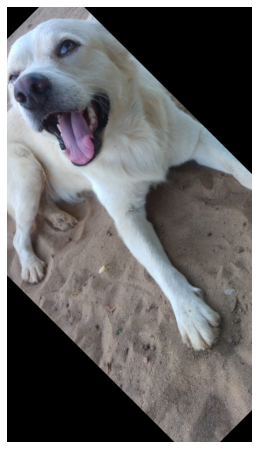

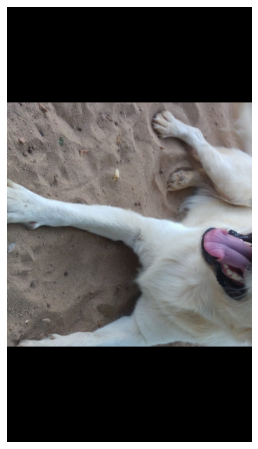

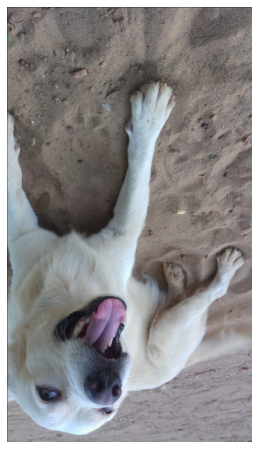

In [19]:
# Leitura da imagem
img = cv2.imread("images/toddy3.jpeg")
showImage(img)

# Obtém as dimensões da imagem e calcule o centro da imagem
(h, w) = img.shape[:2]
center = (w // 2, h // 2)

# Rotaciona a imagem em 45 graus
M = cv2.getRotationMatrix2D(center, 45, 1.0)
rotated_45 = cv2.warpAffine(img, M, (w, h))
showImage(rotated_45)

# Rotaciona a imagem em 90 graus
M = cv2.getRotationMatrix2D(center, -90, 1.0)
rotated_90 = cv2.warpAffine(img, M, (w, h))
showImage(rotated_90)

# Rotaciona a imagem em 180 graus
M = cv2.getRotationMatrix2D(center, 180, 1.0)
rotated_180 = cv2.warpAffine(img, M, (w, h))
showImage(rotated_180)

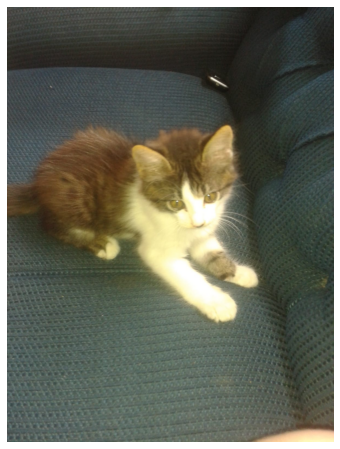

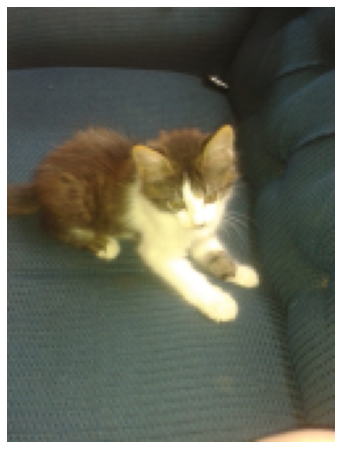

Dimensões: (125, 166)
Redimensão: 0.10416666666666667


In [20]:
# Redimensionamento da imagem
img = cv2.imread("images/mimi.jpeg")
showImage(img)

# Aspect Ratio da imagem (ficou distorcida por conta do matplotlib)
r = 125.0 / img.shape[1]
dim = (125, int(img.shape[0] * r))

# Resize da imagem
resized = cv2.resize(img, dim, interpolation=cv2.INTER_AREA)
showImage(resized)
print(f'Dimensões: {dim}\nRedimensão: {r}')

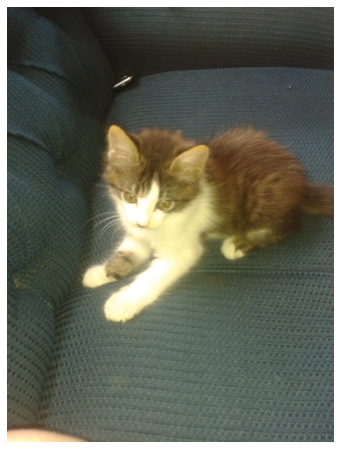

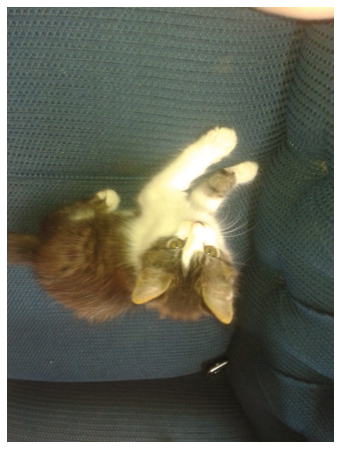

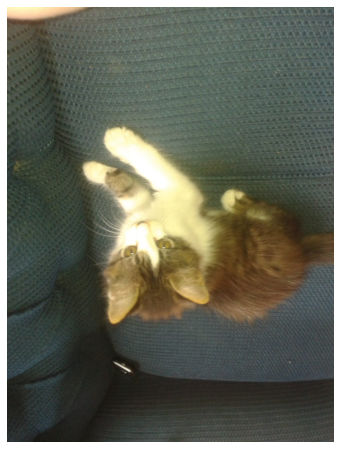

In [21]:
# Flip da imagem
flipped_horizontal = cv2.flip(img, 1)
showImage(flipped_horizontal)

flipped_vertical = cv2.flip(img, 0)
showImage(flipped_vertical)

# Flip horizontal e vertical
flipped = cv2.flip(img, -1)

showImage(flipped)

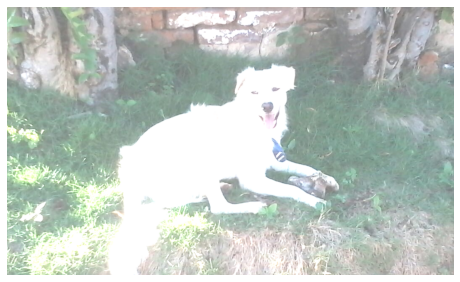

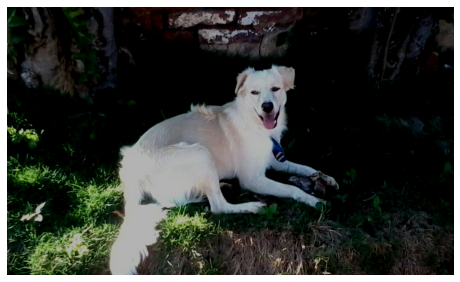

In [22]:
img = cv2.imread("images/toddy.jpeg")

# Aumentando intensidade dos pixels
M = np.ones(img.shape, dtype="uint8") * 100
added = cv2.add(img, M)
showImage(added)

# Diminuindo intensidade dos pixels
M = np.ones(img.shape, dtype="uint8") * 75
subtracted = cv2.subtract(img, M)
showImage(subtracted)